In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle as pkl

In [106]:
df= pd.read_excel('flight_price.xlsx')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df = df.drop(['Unnamed: 0'],axis=1)
display(df.head())

,Flight_Company,Flight_No,Flight_Class,Flight_Model,Departure_Location,Departure_Time,Departure_Day,Departure_Date,Departure_Month,Departure_Duration,Arrival_Location,Arrival_Time,Arrival_Day,Arrival_Date,Arrival_Month,Meal,Flight_Ticket_Price,Single_Connecting_Plane,Double_Connecting_Plane,Luggage
0,IndiGo,6E5279,Economy,Airbus A321,Mumbai,22,Fri,5,Aug,110,Chennai,0,Sat,6.0,Aug,Paid Meal,10143,No primary connecting plane,No secondary connecting plane,15
1,IndiGo,UK823,Economy,Boeing 737-800,Mumbai,17,Fri,5,Aug,120,Chennai,19,Fri,5.0,Aug,Free Meal,10878,No primary connecting plane,No secondary connecting plane,15
2,Vistara,6E5231,Economy,Airbus A321,Mumbai,19,Fri,5,Aug,115,Chennai,21,Fri,5.0,Aug,Paid Meal,12348,No primary connecting plane,No secondary connecting plane,15
3,Vistara,UK827,Economy,Boeing 737-800,Mumbai,21,Fri,5,Aug,125,Chennai,23,Fri,5.0,Aug,Free Meal,15708,No primary connecting plane,No secondary connecting plane,20
4,Vistara,6E5385,Economy,Airbus A321,Chennai,22,Fri,5,Aug,115,Mumbai,0,Sat,6.0,Aug,Paid Meal,10243,No primary connecting plane,No secondary connecting plane,15


In [107]:
day1 = pd.read_excel('day1.xlsx')

In [108]:
day2 = pd.read_excel('day2.xlsx')

In [109]:
day = pd.concat([day1,day2],axis=0)

In [110]:
df['Connecting_Planes'] = day[0].to_list()

In [111]:
df['Connecting_Planes'] = df['Connecting_Planes'].astype(str)

In [112]:
df['Connecting_Planes'] = df['Connecting_Planes'].str.replace('0','No connecting plane').str.replace('1','Has one connecting plane').str.replace('2','Has two connecting planes')

In [113]:
df.shape

(9930, 21)

In [114]:
No=[]
for i in range(len(df['Departure_Month'])):
    No.append(str(df['Departure_Month'][i]) + str(df['Departure_Date'][i]))

In [115]:
df['No'] = No

In [116]:
Days = {'Aug5':0,
 'Aug6':1,
 'Aug9':3,
 'Aug11':5,
 'Aug13':7,
 'Aug14':8,
 'Aug15':9,
 'Aug16':10,
 'Aug17':11,
 'Aug18':12,
 'Aug19':13,
 'Aug20':14,
 'Aug21':15,
 'Aug22':16,
 'Aug23':17,
 'Aug24':18,
 'Aug25':19,
 'Aug26':20,
 'Aug27':21,
 'Aug28':22,
 'Aug29':23,
 'Aug30':24,
 'Sep1':25,
 'Sep3':27,
 'Sep5':29,
 'Sep6':30,
 'Sep7':31,
 'Sep8':32,
 'Sep9':33,
 'Sep10':34,
 'Sep11':35,
 'Sep12':36,
 'Sep13':37,
 'Sep14':38,
 'Sep15':39,
 'Sep16':40,
 'Sep17':41,
 'Sep18':42,
 'Sep19':43,
 'Sep20':44,
 'Sep21':45,
 'Sep22':46,
 'Sep23':47,
 'Sep24':48,
 'Sep25':49,
 'Sep26':50,
 'Sep27':51,
 'Sep28':52,
 'Sep29':53,
  'Sep30':54,
}

In [117]:
df['No_of_days'] = df['No'].map(Days)

In [118]:
df['Luggage'].unique()

array([15, 20, 25, 30, 35, '15', 'Not available', '25', '35', '30', '20'],
      dtype=object)

In [119]:
df['Departure_Location'] = df['Departure_Location'].str.replace(' ','')

In [120]:
df['Departure_Time'] = df['Departure_Time'].astype(str)

In [121]:
df['Arrival_Location'] = df['Arrival_Location'].str.replace(' ','')

In [122]:
df['Arrival_Time'] = df['Arrival_Time'].astype(str)

In [123]:
df['Luggage'] = df['Luggage'].astype(str)

In [124]:
df = df.drop(['Arrival_Date','Arrival_Month'],axis=1)

In [125]:
df['No_of_days'] = df['No_of_days'].astype(str)

In [126]:
df['Departure_Date'] = df['Departure_Date'].astype(str)

In [127]:
df['Departure_Duration'] = df['Departure_Duration'].astype(str)

In [128]:
df = df.drop(['No'],axis=1)

In [129]:
df = df.replace('Not available', np.nan)

In [130]:
df['Flight_Company'] = df['Flight_Company'].str.replace('AirAsia','Air Asia')

In [131]:
df['Travel'] = df['Departure_Location'] +' to ' + df['Arrival_Location']

In [132]:
df['Single_Connecting_Plane'].unique()

array(['No primary connecting plane', 'Has primary plane'], dtype=object)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9930 entries, 0 to 9929
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Flight_Company           9930 non-null   object
 1   Flight_No                9930 non-null   object
 2   Flight_Class             9930 non-null   object
 3   Flight_Model             8122 non-null   object
 4   Departure_Location       9930 non-null   object
 5   Departure_Time           9930 non-null   object
 6   Departure_Day            9930 non-null   object
 7   Departure_Date           9930 non-null   object
 8   Departure_Month          9930 non-null   object
 9   Departure_Duration       9930 non-null   object
 10  Arrival_Location         9930 non-null   object
 11  Arrival_Time             9930 non-null   object
 12  Arrival_Day              9930 non-null   object
 13  Meal                     9800 non-null   object
 14  Flight_Ticket_Price      9930 non-null  

In [134]:
df.columns

Index(['Flight_Company', 'Flight_No', 'Flight_Class', 'Flight_Model',
       'Departure_Location', 'Departure_Time', 'Departure_Day',
       'Departure_Date', 'Departure_Month', 'Departure_Duration',
       'Arrival_Location', 'Arrival_Time', 'Arrival_Day', 'Meal',
       'Flight_Ticket_Price', 'Single_Connecting_Plane',
       'Double_Connecting_Plane', 'Luggage', 'Connecting_Planes', 'No_of_days',
       'Travel'],
      dtype='object')

In [135]:
df['Arrival_Time'] = df['Arrival_Time'].astype(int)

In [136]:
df['Departure_Duration'] = df['Departure_Duration'].astype(int)

In [138]:
df['No_of_days'] = df['No_of_days'].astype(int)

In [139]:
df.columns

Index(['Flight_Company', 'Flight_No', 'Flight_Class', 'Flight_Model',
       'Departure_Location', 'Departure_Time', 'Departure_Day',
       'Departure_Date', 'Departure_Month', 'Departure_Duration',
       'Arrival_Location', 'Arrival_Time', 'Arrival_Day', 'Meal',
       'Flight_Ticket_Price', 'Single_Connecting_Plane',
       'Double_Connecting_Plane', 'Luggage', 'Connecting_Planes', 'No_of_days',
       'Travel'],
      dtype='object')

In [140]:
[i for i in df.columns if df[i].isnull().sum()>0]

['Flight_Model', 'Meal', 'Luggage']

In [141]:
Missing_Data = ['Flight_Model', 'Meal', 'Luggage']

In [142]:
for i in Missing_Data:
    df[i] = df[i].fillna(df[i].dropna().mode()[0])

In [143]:
[i for i in df.columns if df[i].isnull().sum()>0]

[]

In [144]:
df.select_dtypes(include=['object']).columns

Index(['Flight_Company', 'Flight_No', 'Flight_Class', 'Flight_Model',
       'Departure_Location', 'Departure_Time', 'Departure_Day',
       'Departure_Date', 'Departure_Month', 'Arrival_Location', 'Arrival_Day',
       'Meal', 'Single_Connecting_Plane', 'Double_Connecting_Plane', 'Luggage',
       'Connecting_Planes', 'Travel'],
      dtype='object')

In [146]:
df1 = df[['Flight_Company', 'Flight_No', 'Flight_Class','Flight_Model','Travel', 'Departure_Time', 'Departure_Day','Departure_Date', 'Departure_Month', 'Departure_Duration','Arrival_Time', 'Arrival_Day', 'Meal',
       'Flight_Ticket_Price','Luggage', 'Connecting_Planes','No_of_days']]

In [147]:
Columns,Datatype,Unique_values,Mode_Mean = [],[],[],[]
for i in df1.columns:
    Datatype.append(df1[i].dtype)
    Columns.append(i)
    Unique_values.append(df[i].nunique())
    if df1[i].dtype == 'object':
        Mode_Mean.append(df1[i].mode())
    else:
        Mode_Mean.append(df1[i].mean())

In [148]:
Dataset = pd.DataFrame(zip(Columns,Datatype,Unique_values,Mode_Mean),columns=('Columns','Datatype','Unique_values','Mode_Mean'))

In [149]:
Dataset

,Columns,Datatype,Unique_values,Mode_Mean
0,Flight_Company,object,9,0 Vistara Premium Economy dtype: object
1,Flight_No,object,446,0 UK832 dtype: object
2,Flight_Class,object,3,0 Economy dtype: object
3,Flight_Model,object,19,"0 Vistara, Airbus A320-100 dtype: object"
4,Travel,object,6,0 Bengaluru to Mumbai dtype: object
5,Departure_Time,object,22,0 7 dtype: object
6,Departure_Day,object,7,0 Sat dtype: object
7,Departure_Date,object,28,0 29 dtype: object
8,Departure_Month,object,2,0 Aug dtype: object
9,Departure_Duration,int32,68,126.704935


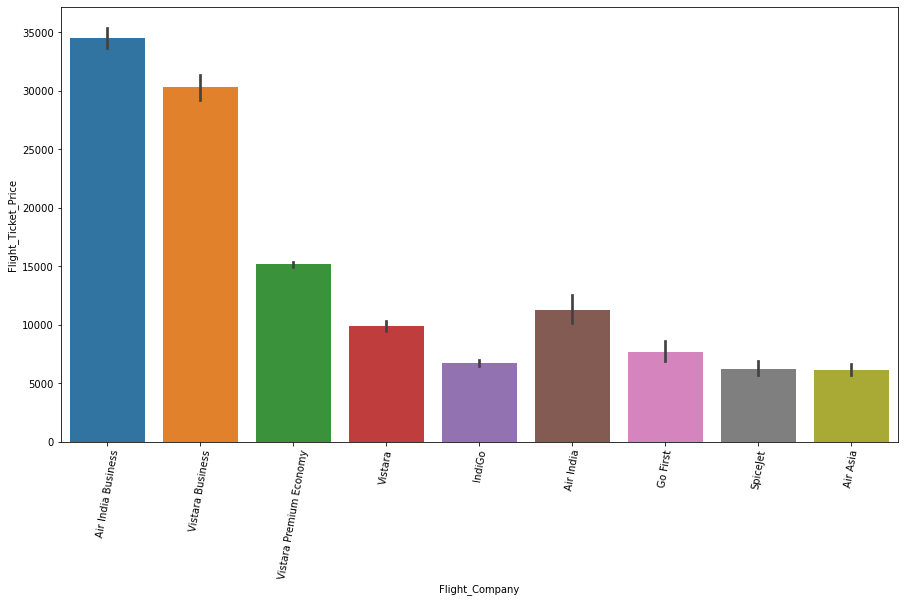

In [211]:
plt.figure(figsize=(15,8))
sns.barplot(x='Flight_Company',y='Flight_Ticket_Price',data=df.sort_values('Flight_Ticket_Price',ascending=False))
plt.xticks(rotation=80)
plt.show()

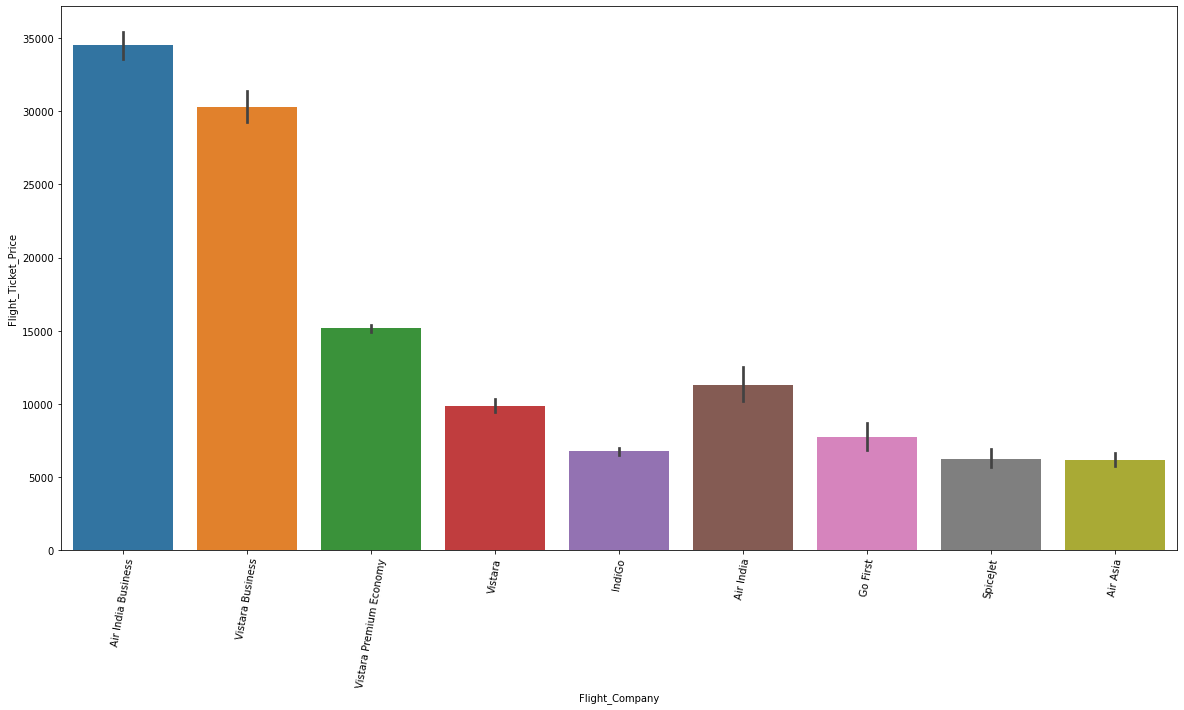

In [212]:
plt.figure(figsize=(20,10))
sns.barplot(x='Flight_Company',y='Flight_Ticket_Price',data=df.sort_values('Flight_Ticket_Price',ascending=False))
plt.xticks(rotation=80)
plt.show()

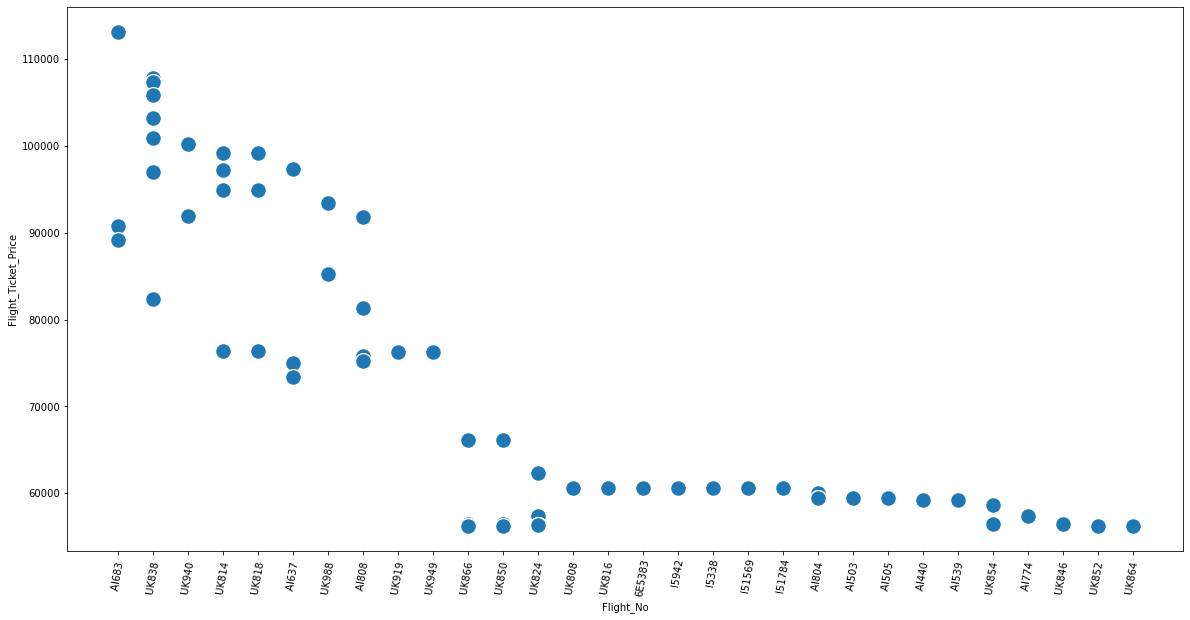

In [140]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Flight_No',y='Flight_Ticket_Price',data=df.nlargest(100, 'Flight_Ticket_Price'),s=250)
plt.xticks(rotation=80)
plt.show()

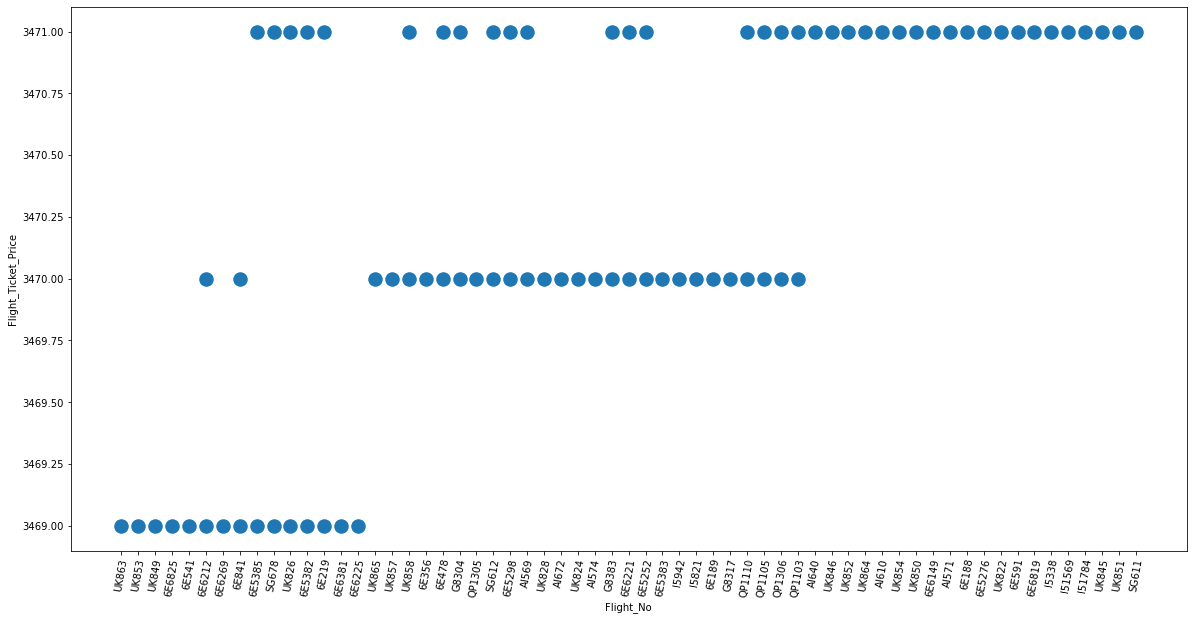

In [143]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Flight_No',y='Flight_Ticket_Price',data=df.nsmallest(100, 'Flight_Ticket_Price'),s=250)
plt.xticks(rotation=80)
plt.show()

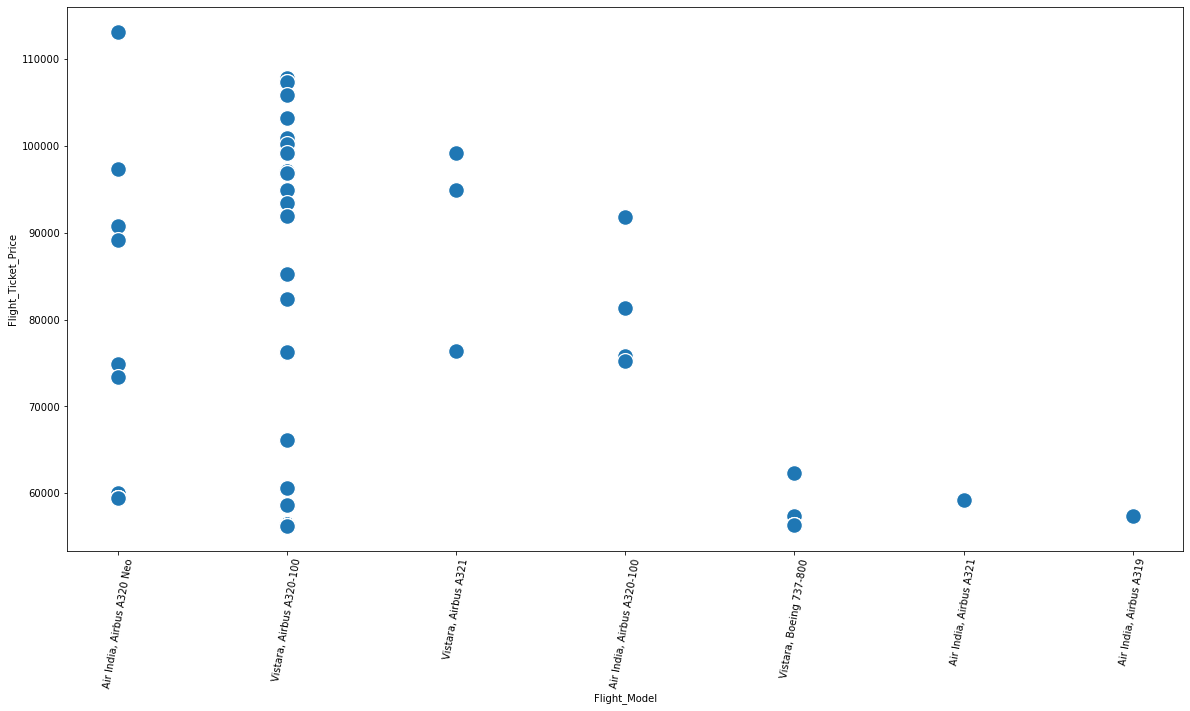

In [144]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Flight_Model',y='Flight_Ticket_Price',data=df.nlargest(100, 'Flight_Ticket_Price'),s=250)
plt.xticks(rotation=80)
plt.show()

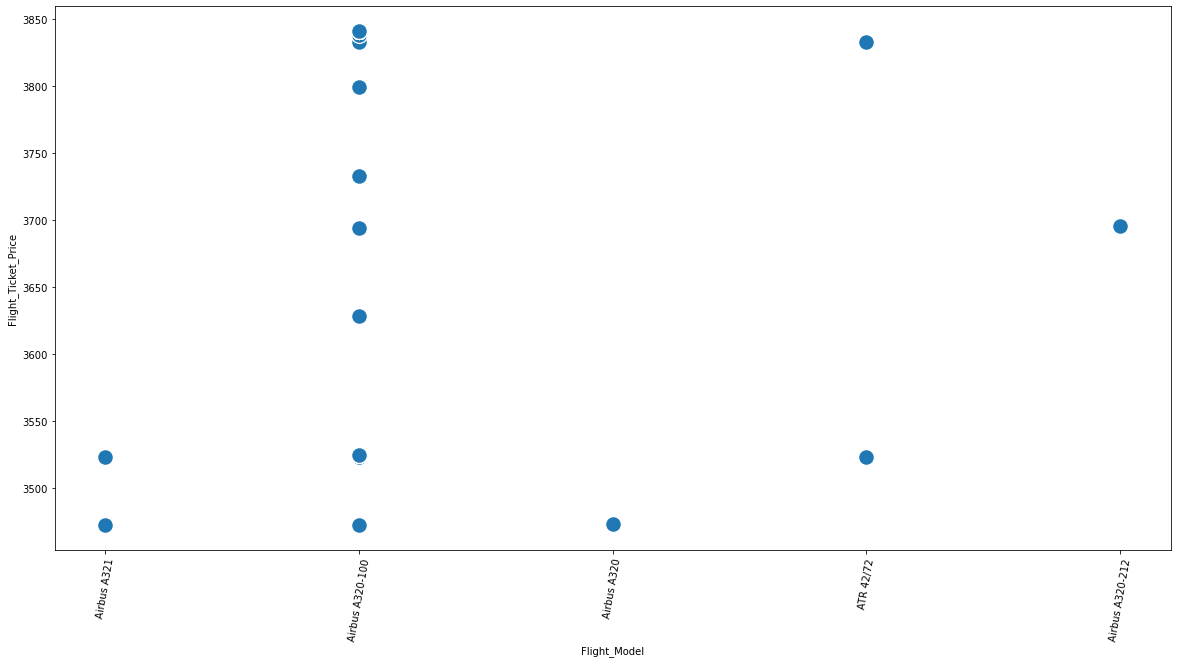

In [147]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Flight_Model',y='Flight_Ticket_Price',data=df.nsmallest(1000, 'Flight_Ticket_Price'),s=250)
plt.xticks(rotation=80)
plt.show()

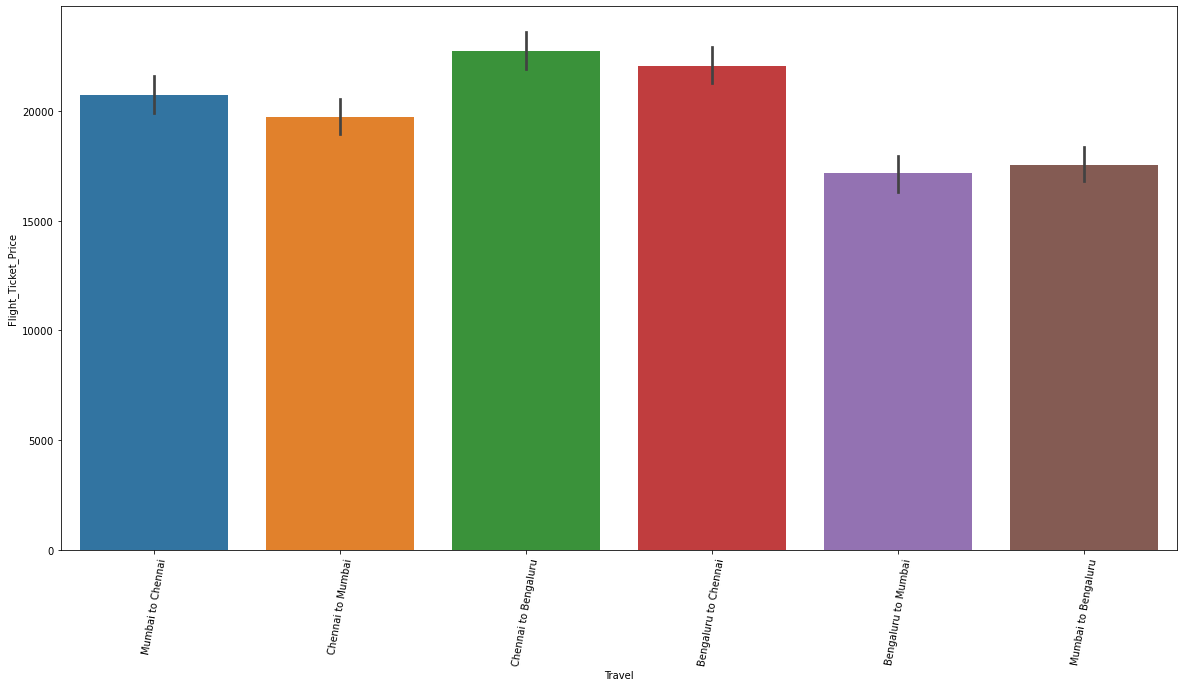

In [213]:
plt.figure(figsize=(20,10))
sns.barplot(x='Travel',y='Flight_Ticket_Price',data=df.sort_values('Flight_Ticket_Price',ascending=False))
plt.xticks(rotation=80)
plt.show()

In [223]:
df['No_of_days'] = df['No_of_days'].astype(int)

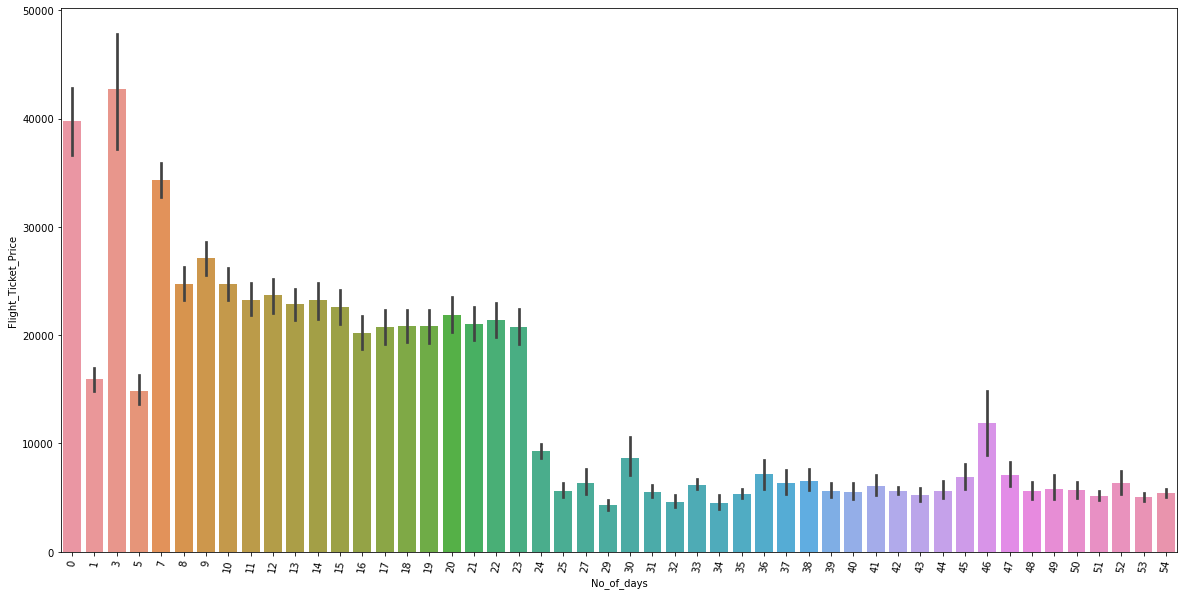

In [224]:
plt.figure(figsize=(20,10))
sns.barplot(x='No_of_days',y='Flight_Ticket_Price',data=df.sort_values('No_of_days'))
plt.xticks(rotation=80)
plt.show()

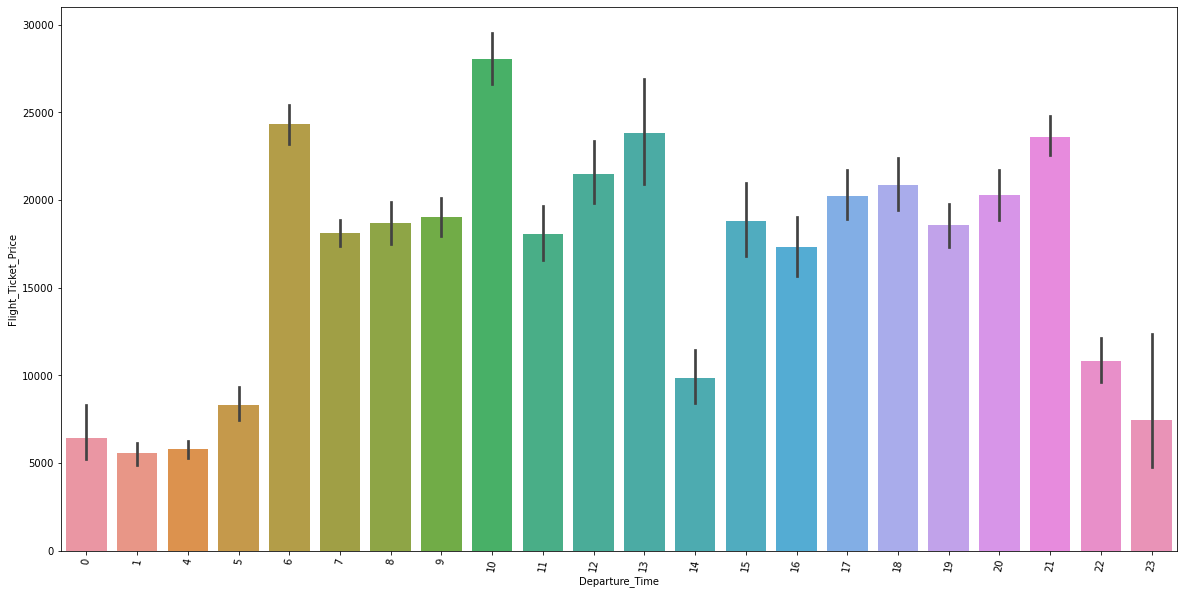

In [225]:
plt.figure(figsize=(20,10))
sns.barplot(x='Departure_Time',y='Flight_Ticket_Price',data=df.sort_values('Departure_Time'))
plt.xticks(rotation=80)
plt.show()

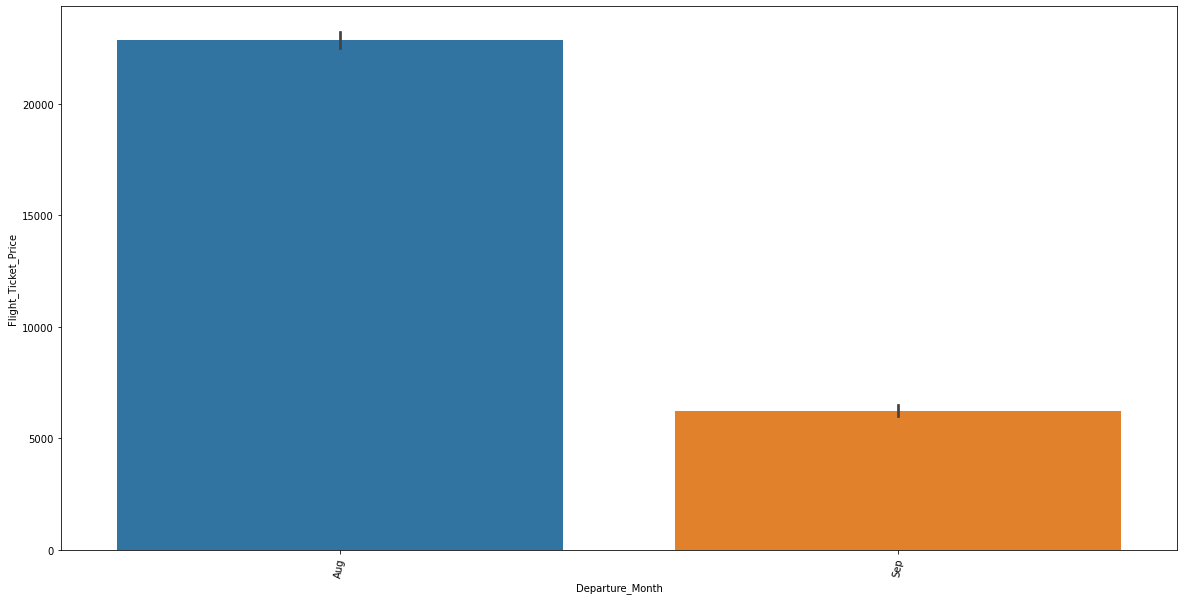

In [226]:
plt.figure(figsize=(20,10))
sns.barplot(x='Departure_Month',y='Flight_Ticket_Price',data=df.sort_values('Departure_Month'))
plt.xticks(rotation=80)
plt.show()

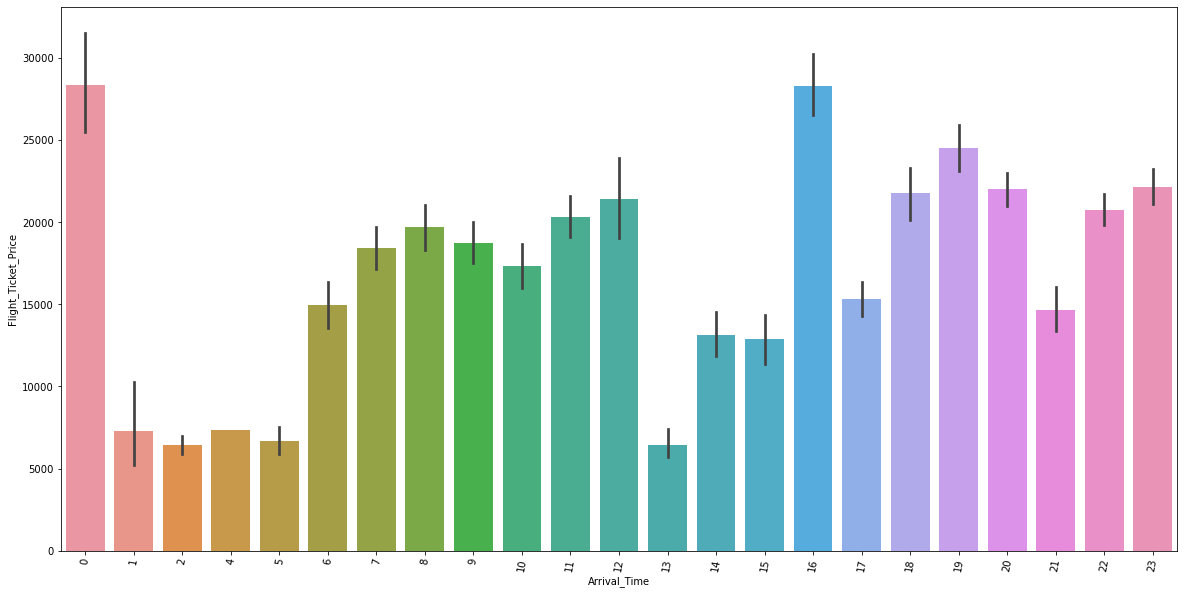

In [228]:
plt.figure(figsize=(20,10))
sns.barplot(x='Arrival_Time',y='Flight_Ticket_Price',data=df.sort_values('Arrival_Time'))
plt.xticks(rotation=80)
plt.show()

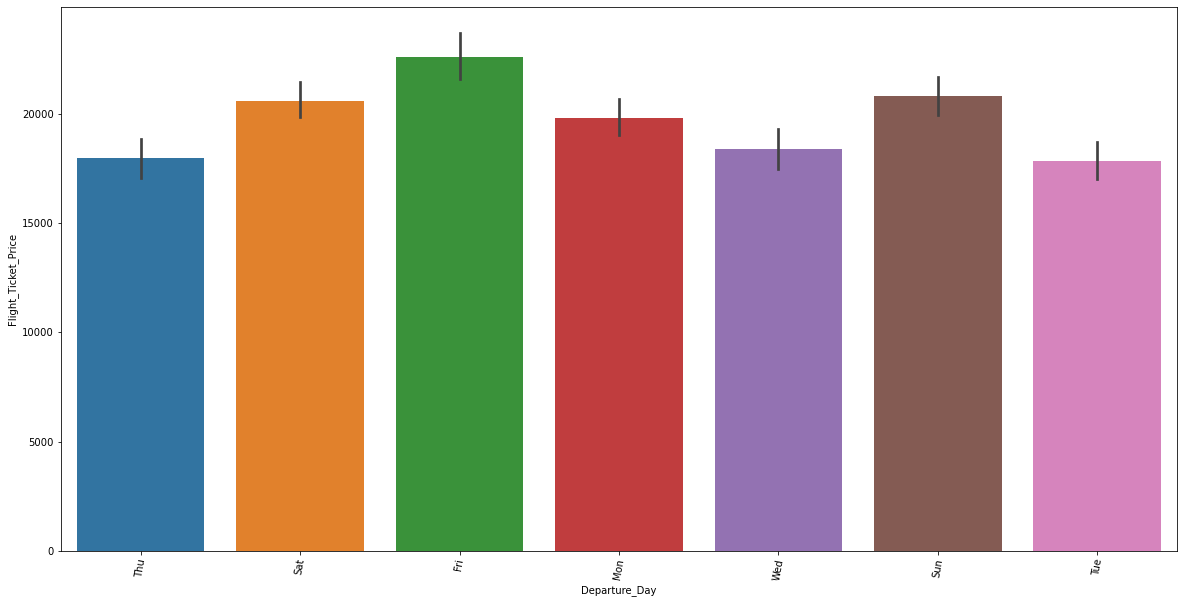

In [230]:
plt.figure(figsize=(20,10))
sns.barplot(x='Departure_Day',y='Flight_Ticket_Price',data=df.sort_values('Flight_Ticket_Price'))
plt.xticks(rotation=80)
plt.show()

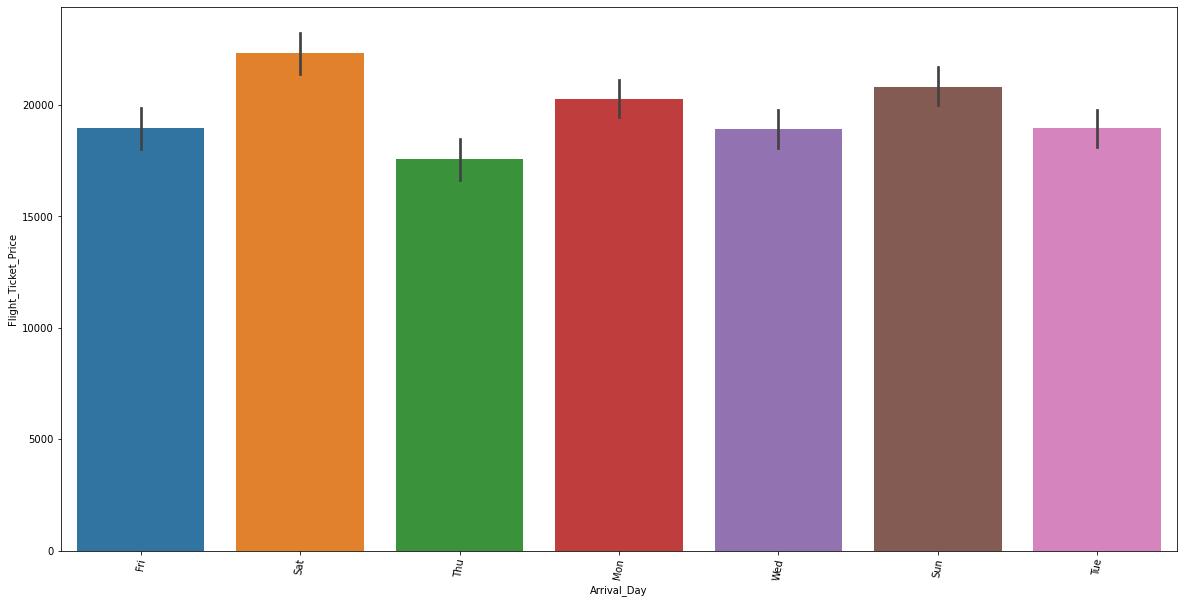

In [231]:
plt.figure(figsize=(20,10))
sns.barplot(x='Arrival_Day',y='Flight_Ticket_Price',data=df.sort_values('Flight_Ticket_Price'))
plt.xticks(rotation=80)
plt.show()

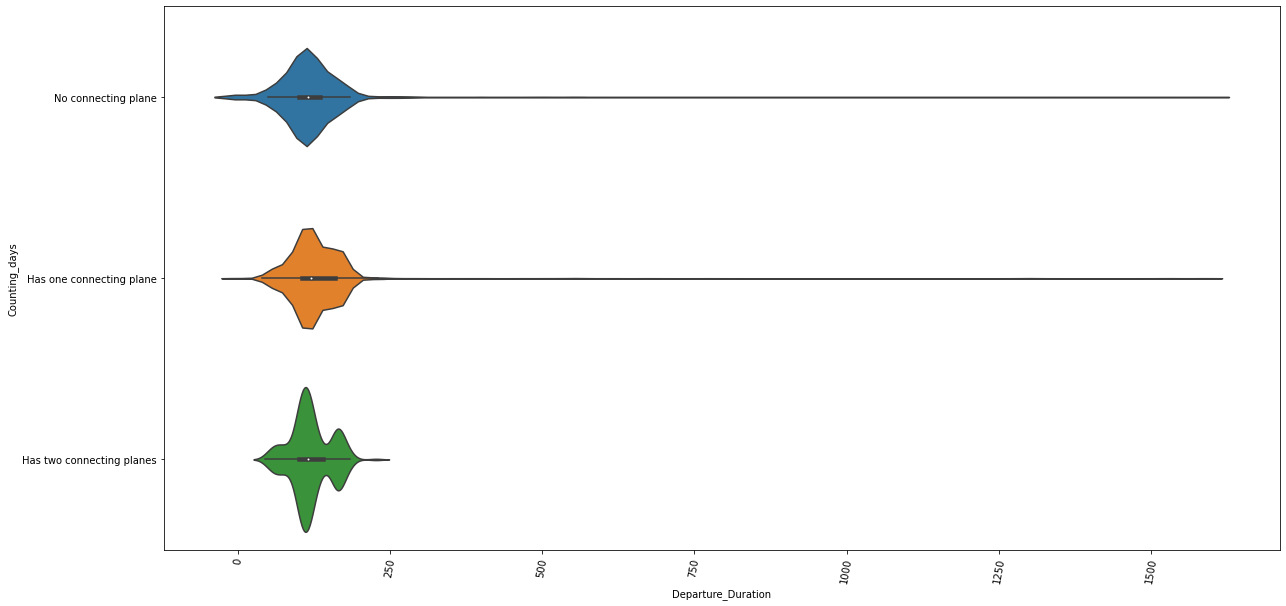

In [245]:
plt.figure(figsize=(20,10))
sns.violinplot(x='Departure_Duration',y='Counting_days',data=df)
plt.xticks(rotation=80)
plt.show()

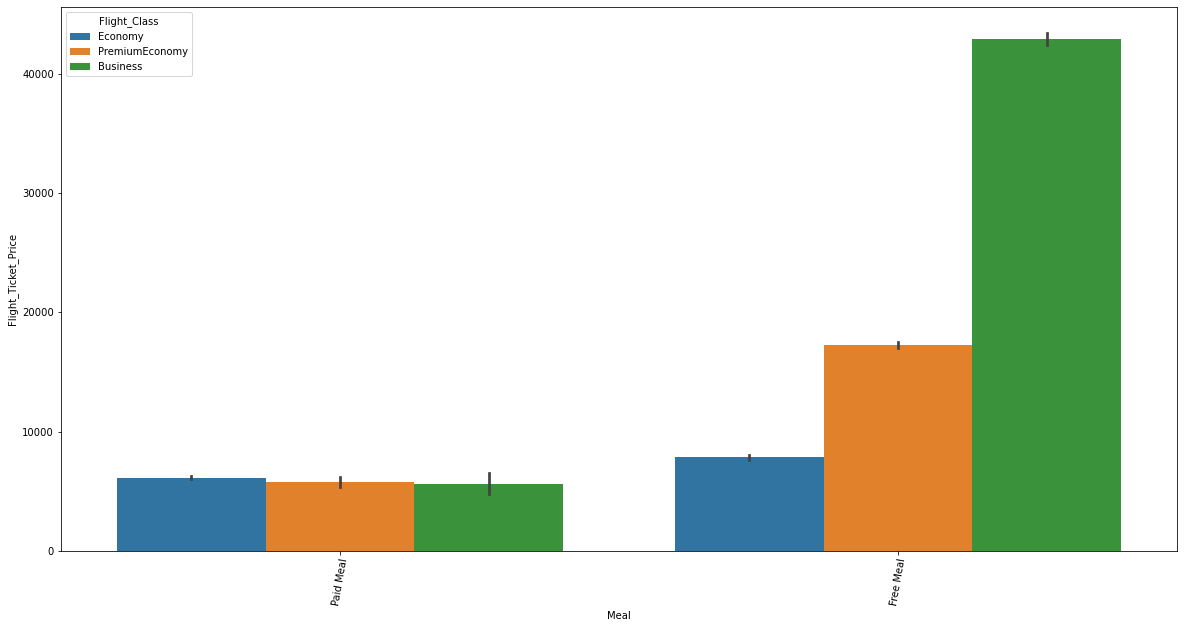

In [247]:
plt.figure(figsize=(20,10))
sns.barplot(x='Meal',y='Flight_Ticket_Price',data=df,hue='Flight_Class')
plt.xticks(rotation=80)
plt.show()

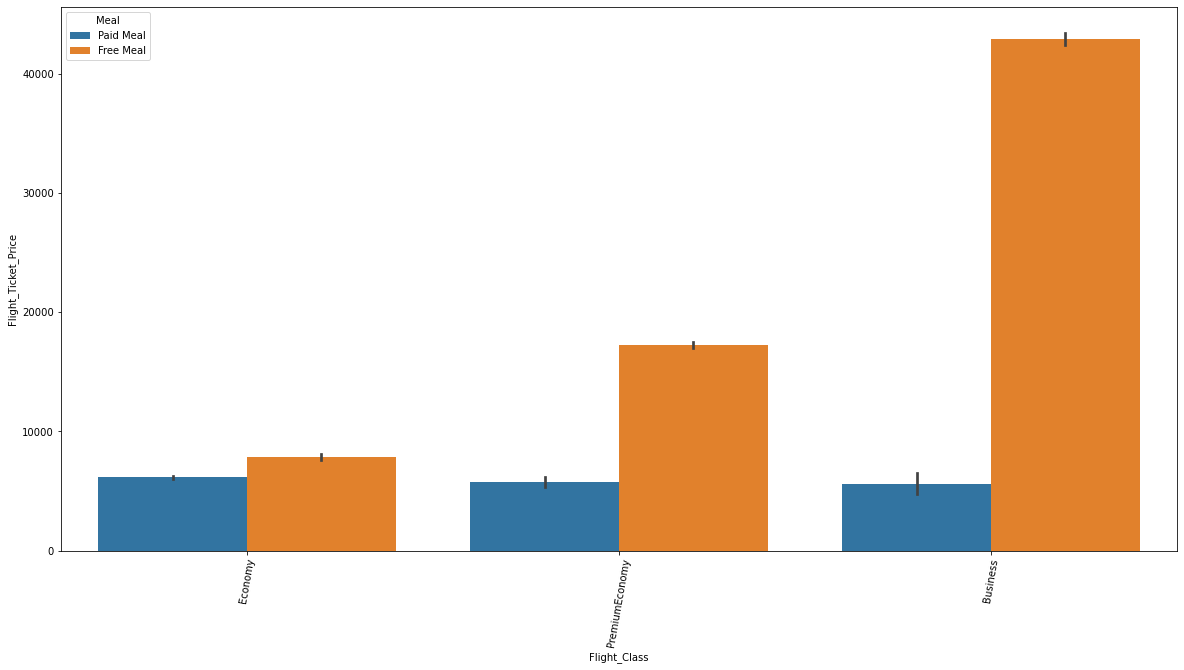

In [249]:
plt.figure(figsize=(20,10))
sns.barplot(x='Flight_Class',y='Flight_Ticket_Price',data=df,hue='Meal')
plt.xticks(rotation=80)
plt.show()

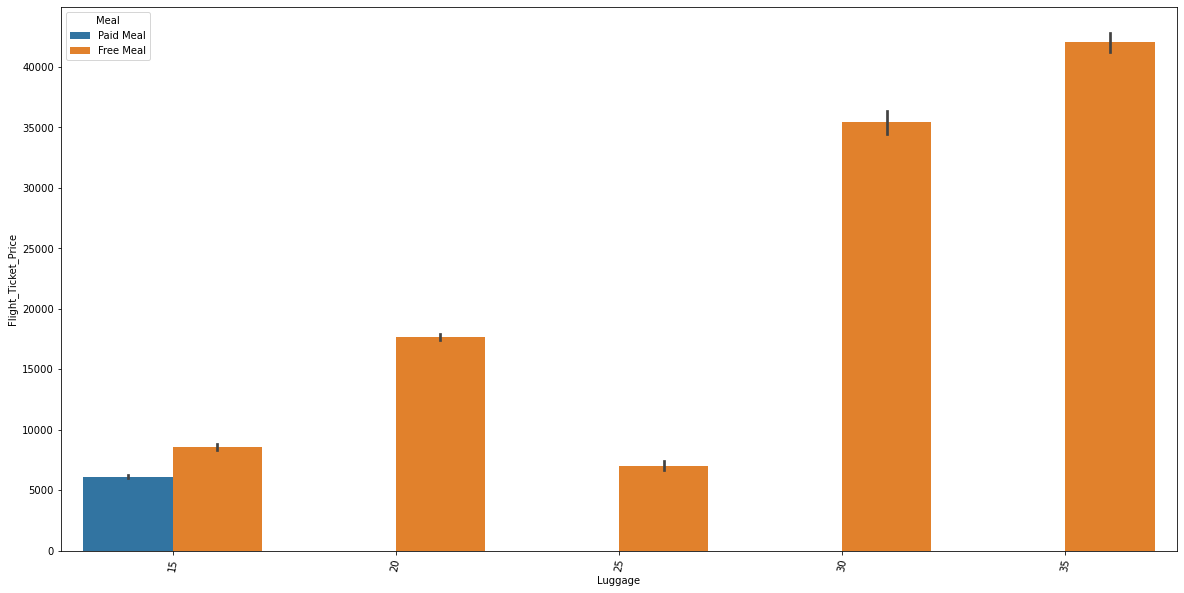

In [251]:
plt.figure(figsize=(20,10))
sns.barplot(x='Luggage',y='Flight_Ticket_Price',data=df,hue='Meal')
plt.xticks(rotation=80)
plt.show()

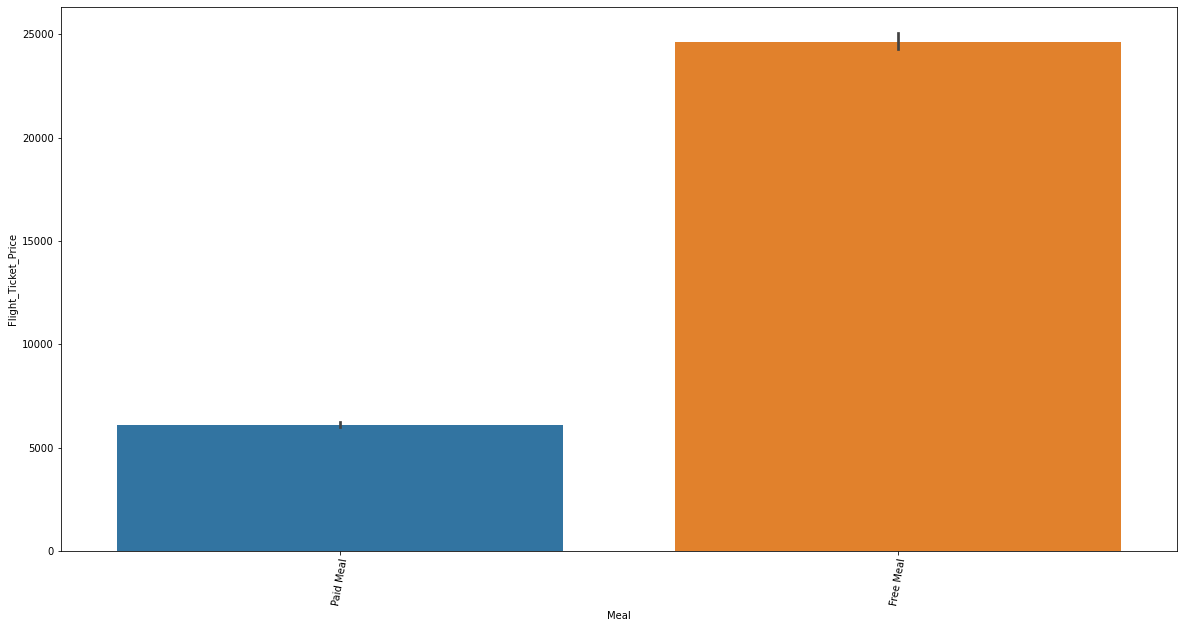

In [256]:
plt.figure(figsize=(20,10))
sns.barplot(x='Meal',y='Flight_Ticket_Price',data=df)
plt.xticks(rotation=80)
plt.show()

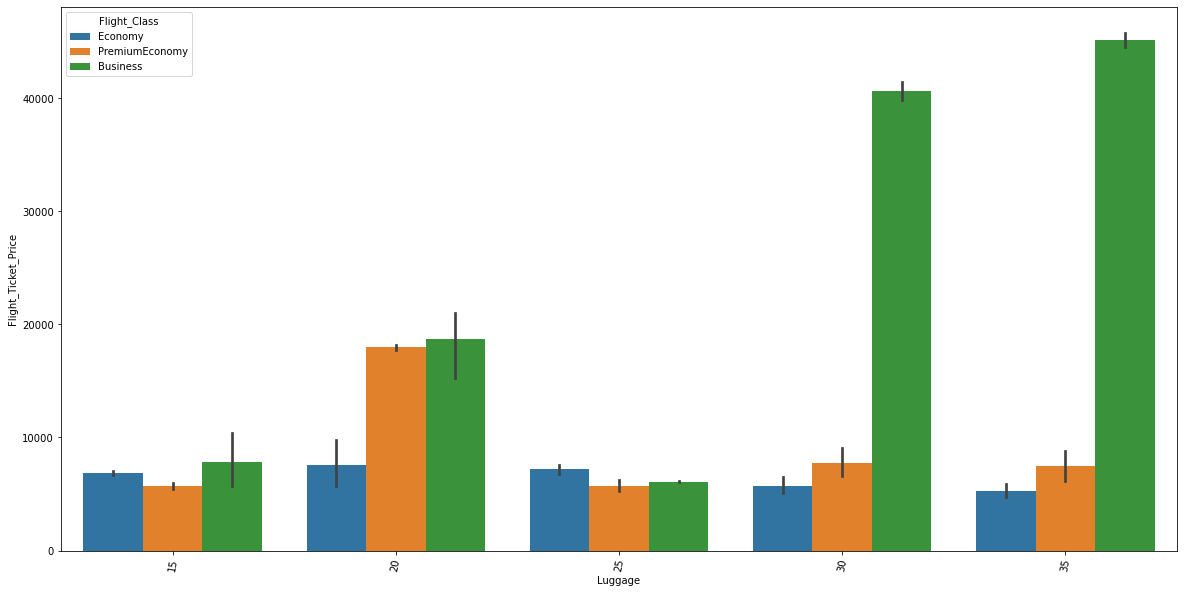

In [252]:
plt.figure(figsize=(20,10))
sns.barplot(x='Luggage',y='Flight_Ticket_Price',data=df,hue='Flight_Class')
plt.xticks(rotation=80)
plt.show()

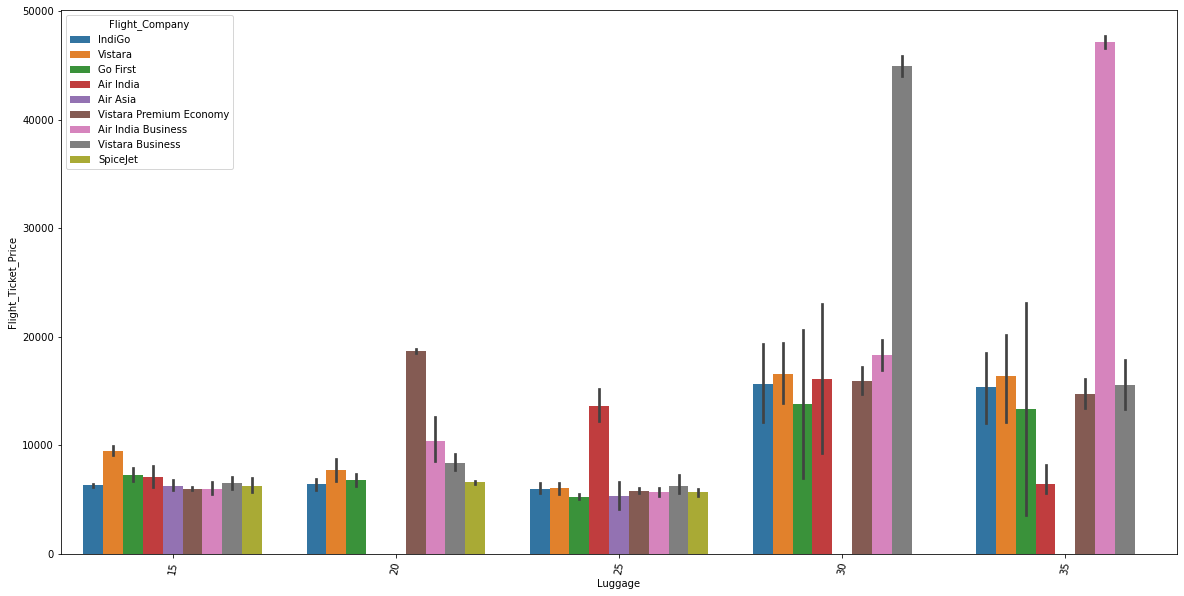

In [253]:
plt.figure(figsize=(20,10))
sns.barplot(x='Luggage',y='Flight_Ticket_Price',data=df,hue='Flight_Company')
plt.xticks(rotation=80)
plt.show()

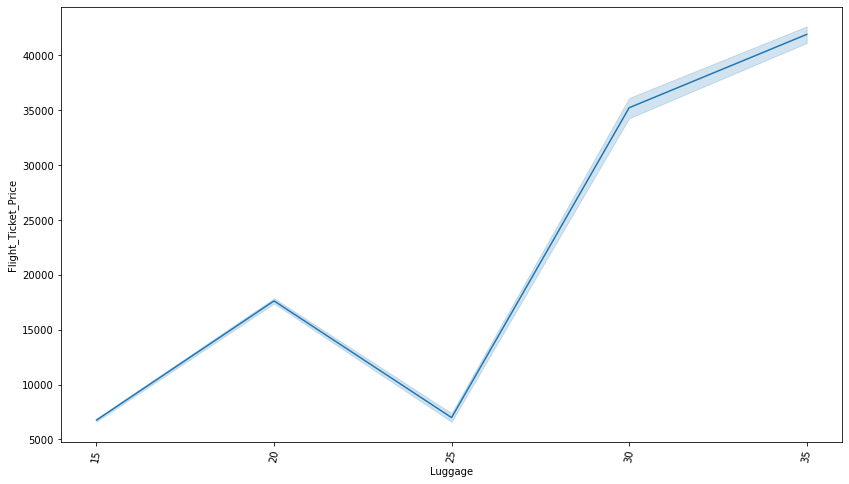

In [255]:
plt.figure(figsize=(14,8))
sns.lineplot(x='Luggage',y='Flight_Ticket_Price',data=df)
plt.xticks(rotation=80)
plt.show()

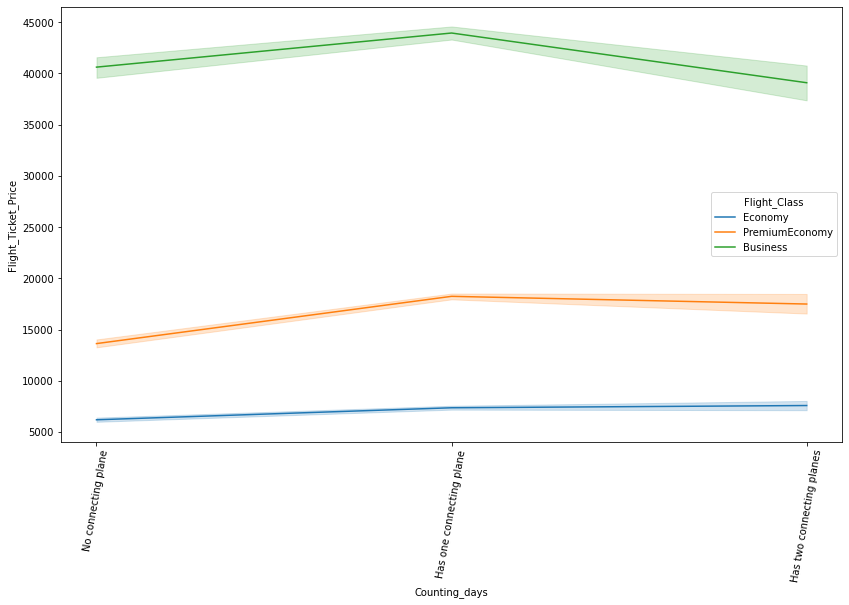

In [264]:
plt.figure(figsize=(14,8))
sns.lineplot(x='Counting_days',y='Flight_Ticket_Price',data=df,hue='Flight_Class')
plt.xticks(rotation=80)
plt.show()

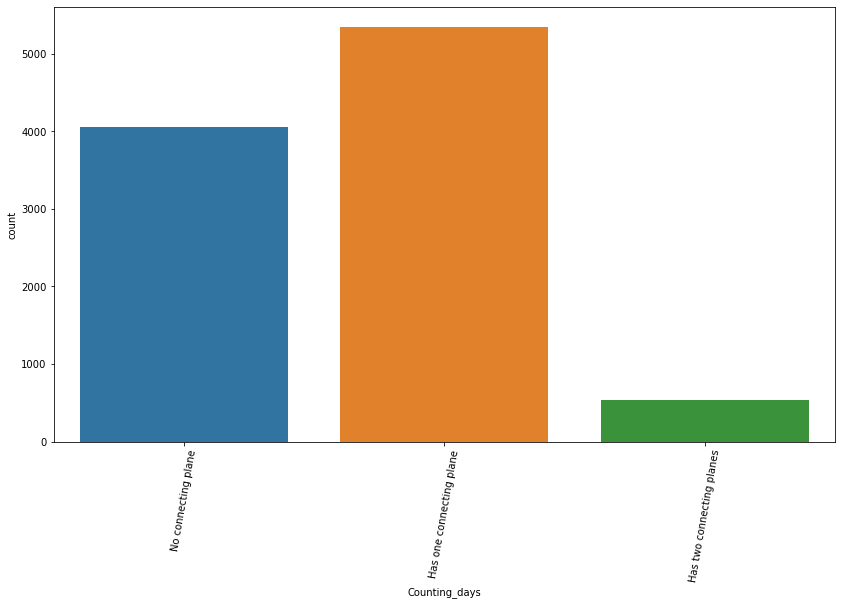

In [266]:
plt.figure(figsize=(14,8))
sns.countplot(x='Counting_days',data=df)
plt.xticks(rotation=80)
plt.show()

In [42]:
df['Travel'].unique()

array(['Mumbai to Chennai', 'Chennai to Mumbai', 'Bengaluru to Mumbai',
       'Chennai to Bengaluru', 'Mumbai to Bengaluru',
       'Bengaluru to Chennai'], dtype=object)

In [145]:
df['Travel'] = df['Departure_Location'] + ' to ' + df['Arrival_Location']

In [50]:
df1 = df[['Flight_Company', 'Flight_No', 'Flight_Class','Flight_Model','Travel', 'Departure_Time', 'Departure_Day','Departure_Date', 'Departure_Month', 'Departure_Duration','Arrival_Time', 'Arrival_Day', 'Meal',
       'Flight_Ticket_Price','Luggage', 'Connecting_Planes','No_of_days']]

In [51]:
df1.columns

Index(['Flight_Company', 'Flight_No', 'Flight_Class', 'Flight_Model', 'Travel',
       'Departure_Time', 'Departure_Day', 'Departure_Date', 'Departure_Month',
       'Departure_Duration', 'Arrival_Time', 'Arrival_Day', 'Meal',
       'Flight_Ticket_Price', 'Luggage', 'Connecting_Planes', 'No_of_days'],
      dtype='object')

In [53]:
df1['Departure_Duration'] = df1['Departure_Duration'].astype(int)

In [39]:
df['Departure_Date'] = df['Departure_Date'].astype(str)

In [38]:
df['Departure_Time'] = df['Departure_Time'].astype(str)

In [54]:
category = ['Flight_Company', 'Flight_No', 'Flight_Class', 'Flight_Model', 'Travel',
       'Departure_Time', 'Departure_Day', 'Departure_Date', 'Departure_Month',
        'Arrival_Time', 'Arrival_Day', 'Meal',
       'Flight_Ticket_Price', 'Luggage', 'Connecting_Planes']
lab = LabelEncoder()
for i in category:
    df1[i] = lab.fit_transform(df1[i])

print(df1.dtypes)

Flight_Company         int64
Flight_No              int64
Flight_Class           int64
Flight_Model           int64
Travel                 int64
Departure_Time         int64
Departure_Day          int64
Departure_Date         int64
Departure_Month        int64
Departure_Duration     int32
Arrival_Time           int64
Arrival_Day            int64
Meal                   int64
Flight_Ticket_Price    int64
Luggage                int64
Connecting_Planes      int64
No_of_days             int32
dtype: object


In [55]:
df1.corr()

,Flight_Company,Flight_No,Flight_Class,Flight_Model,Travel,Departure_Time,Departure_Day,Departure_Date,Departure_Month,Departure_Duration,Arrival_Time,Arrival_Day,Meal,Flight_Ticket_Price,Luggage,Connecting_Planes,No_of_days
Flight_Company,1.000000,0.139491,0.468501,0.629298,-0.031105,0.006001,-0.026007,-0.013292,0.014873,0.017310,0.064471,-0.023770,-0.104387,-0.101254,-0.323336,0.020082,-0.024439
Flight_No,0.139491,1.000000,0.089481,0.318620,0.106111,0.065816,0.034131,0.014080,0.474704,-0.032678,0.077197,-0.003480,0.076719,-0.490548,-0.175653,0.198505,0.426124
Flight_Class,0.468501,0.089481,1.000000,0.528444,-0.011338,0.006631,0.015652,0.034314,0.131390,0.077342,0.061788,0.021114,0.002007,-0.385549,-0.615706,0.084334,0.097655
Flight_Model,0.629298,0.318620,0.528444,1.000000,-0.036581,-0.010962,-0.005961,-0.007632,0.315321,0.041421,0.065321,-0.008306,-0.085474,-0.211794,-0.386034,0.164529,0.238295
Travel,-0.031105,0.106111,-0.011338,-0.036581,1.000000,-0.068995,0.005904,0.005936,-0.003890,0.000393,0.018089,0.000846,0.040308,-0.021962,0.023248,0.011742,0.000069
Departure_Time,0.006001,0.065816,0.006631,-0.010962,-0.068995,1.000000,-0.040861,-0.032062,-0.004572,0.000403,0.070928,-0.034695,-0.058219,-0.011798,0.021649,-0.002354,-0.019138
Departure_Day,-0.026007,0.034131,0.015652,-0.005961,0.005904,-0.040861,1.000000,-0.127997,0.042383,-0.001910,-0.013043,0.771910,0.027140,-0.077440,-0.007496,0.031219,0.063792
Departure_Date,-0.013292,0.014080,0.034314,-0.007632,0.005936,-0.032062,-0.127997,1.000000,-0.005618,-0.028357,-0.003838,-0.074772,0.029589,-0.106691,-0.076810,0.008799,0.177757
Departure_Month,0.014873,0.474704,0.131390,0.315321,-0.003890,-0.004572,0.042383,-0.005618,1.000000,0.059587,-0.001693,0.013848,0.183434,-0.498262,-0.128491,0.482108,0.854750
Departure_Duration,0.017310,-0.032678,0.077342,0.041421,0.000393,0.000403,-0.001910,-0.028357,0.059587,1.000000,0.021575,-0.000737,-0.151423,0.228077,0.092406,-0.022188,0.040141


<AxesSubplot:>

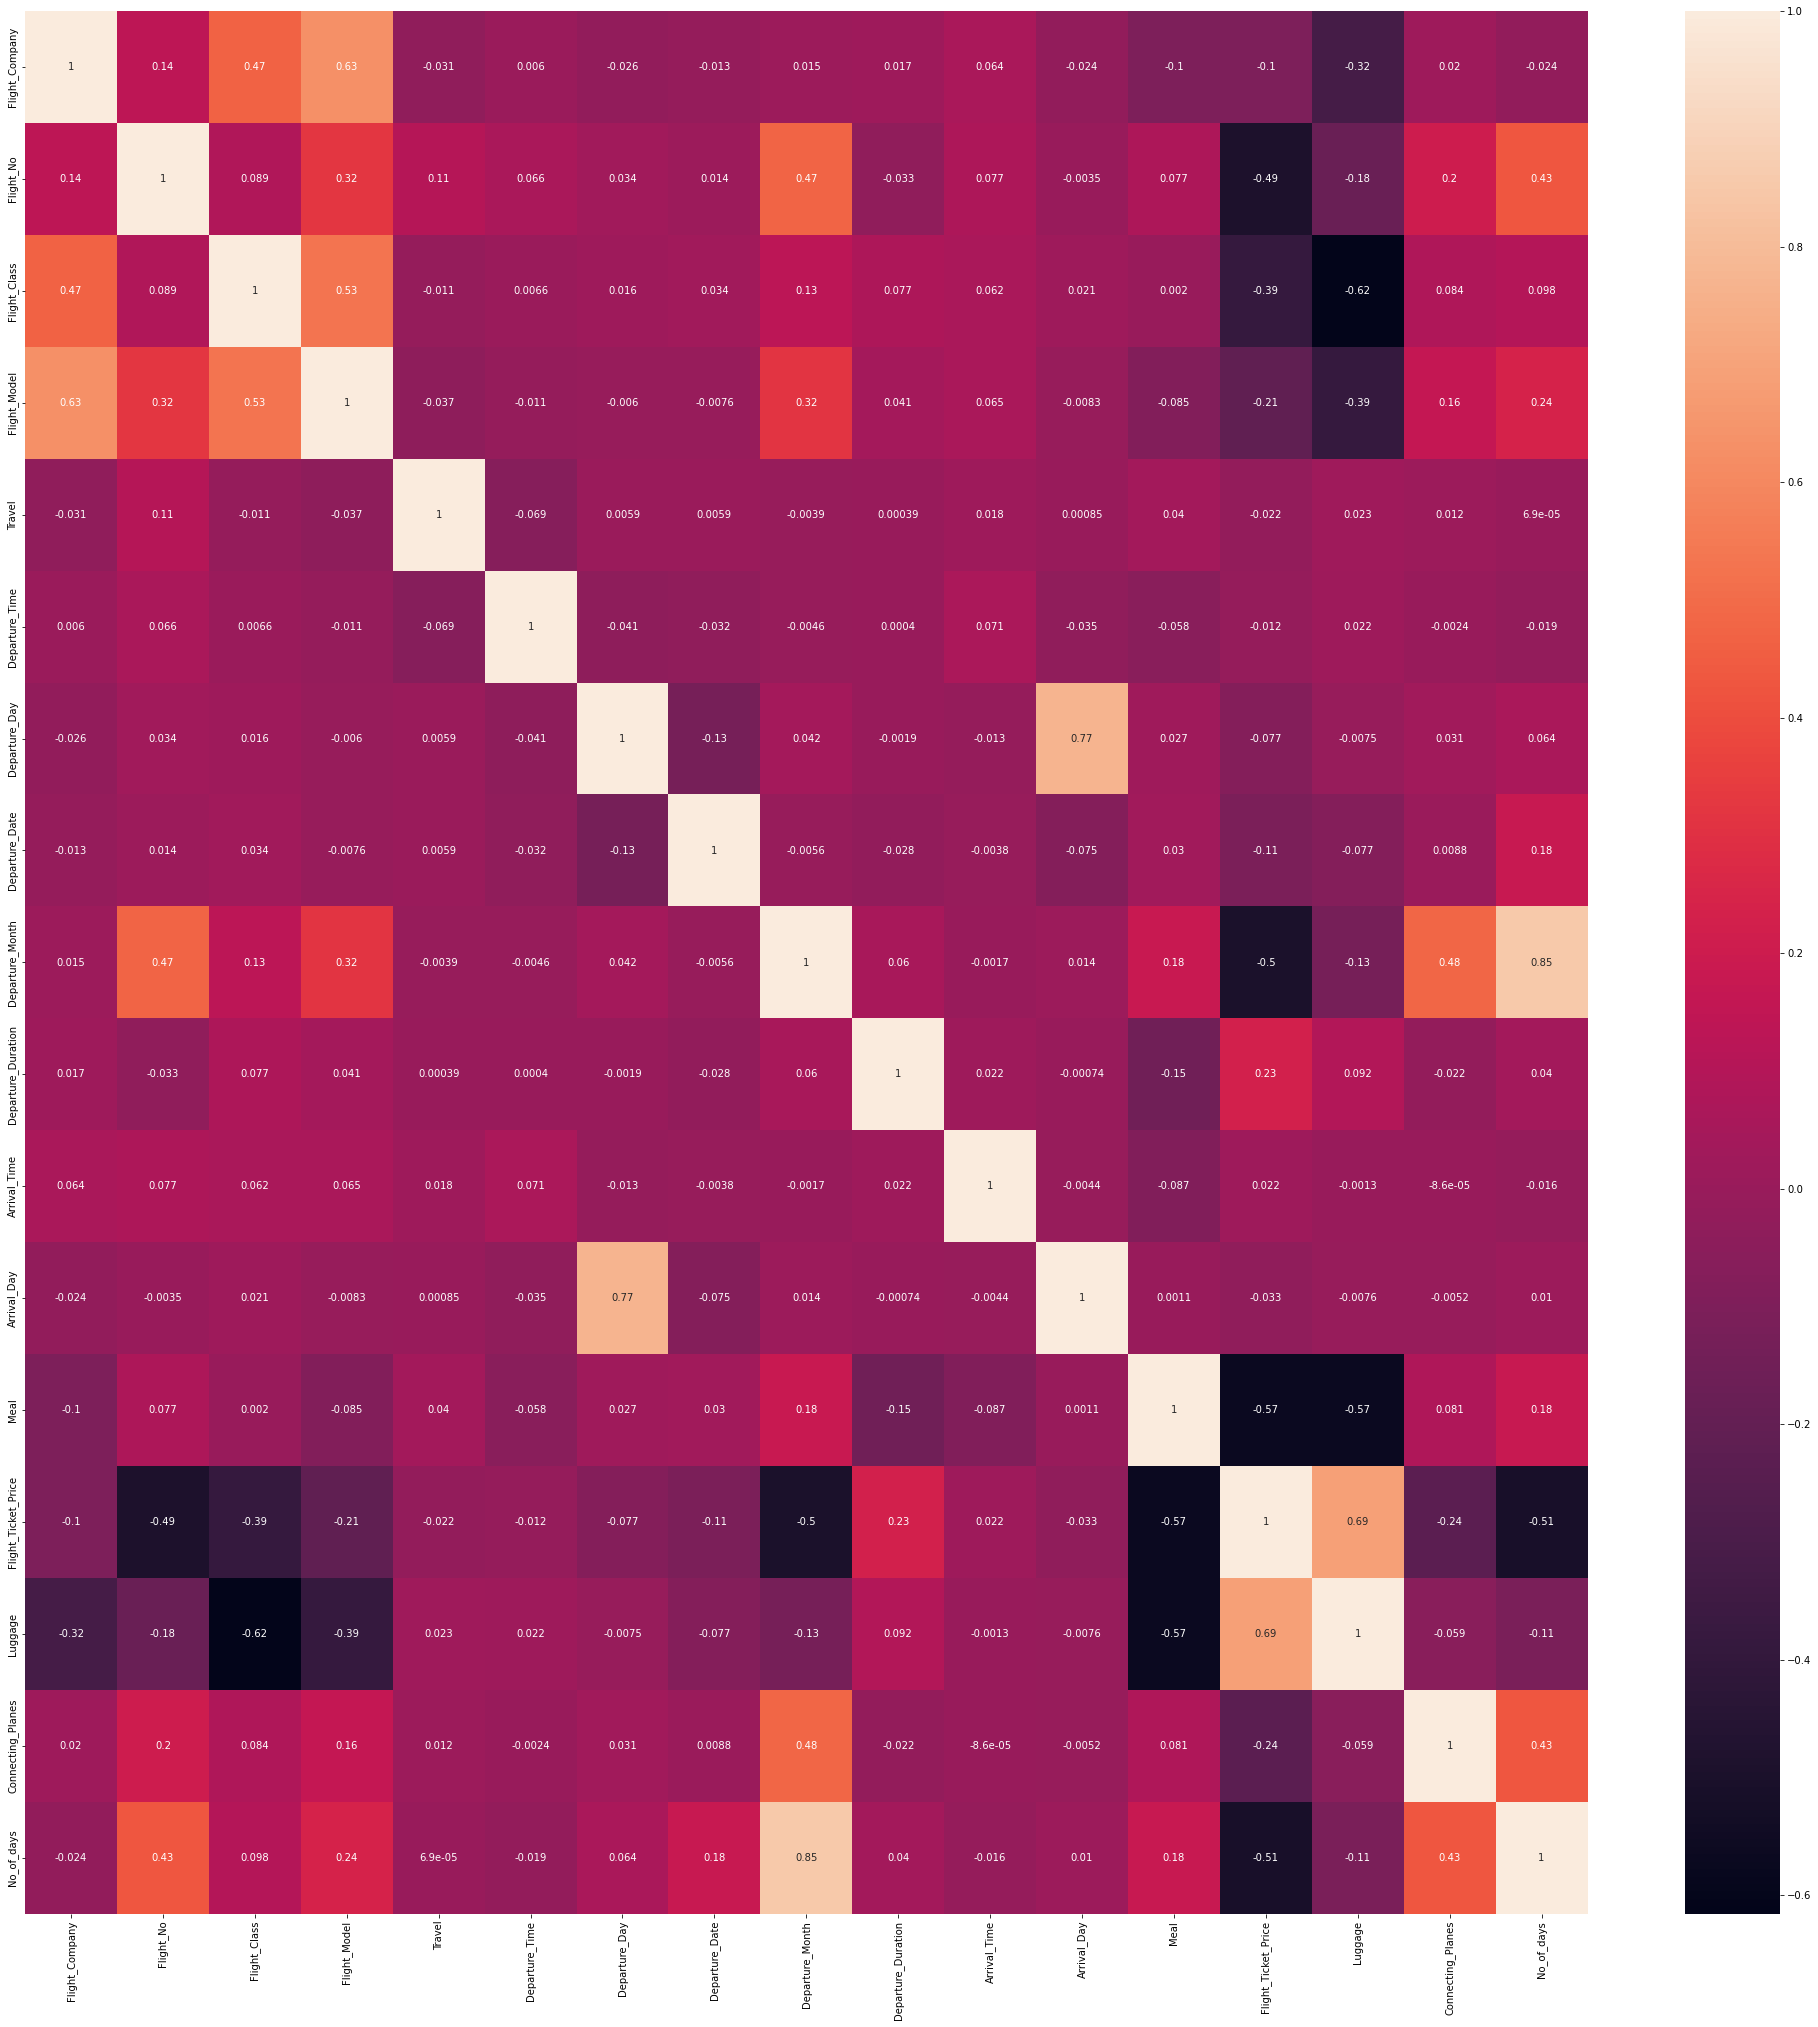

In [56]:
plt.figure(figsize=(35,35))
sns.heatmap(df1.corr(),annot=True)

In [57]:
for i in df1.columns:
    Q1,Q3 = np.percentile(df1[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_no_outliers = df1[(df1[i] < lower_range) | (df1[i] > upper_range)]

In [59]:
df1.shape

(9930, 17)

In [58]:
df_no_outliers.shape

(1061, 17)

In [61]:
z = np.abs(zscore(df1))
threshold = 3
print(np.where(z<3))
print(df1.shape)

(array([   0,    0,    0, ..., 9929, 9929, 9929], dtype=int64), array([ 0,  1,  2, ..., 14, 15, 16], dtype=int64))
(9930, 17)


In [62]:
df_new = df1[(z<3).all(axis = 1)]
df_new.shape

(9835, 17)

In [66]:
for i in df_new.columns :
    if df_new.skew().loc[i]>0.60:
        df_new[i] = np.log1p(df_new[i])

In [67]:
df_new.skew()

Flight_Company        -0.828887
Flight_No              0.560104
Flight_Class          -0.110218
Flight_Model          -1.134737
Travel                 0.002249
Departure_Time        -0.321737
Departure_Day          0.119134
Departure_Date         0.067921
Departure_Month        1.718487
Departure_Duration     0.196024
Arrival_Time          -0.179093
Arrival_Day            0.081529
Meal                   1.193403
Flight_Ticket_Price    0.088361
Luggage                0.599259
Connecting_Planes      0.268699
No_of_days            -1.553968
dtype: float64

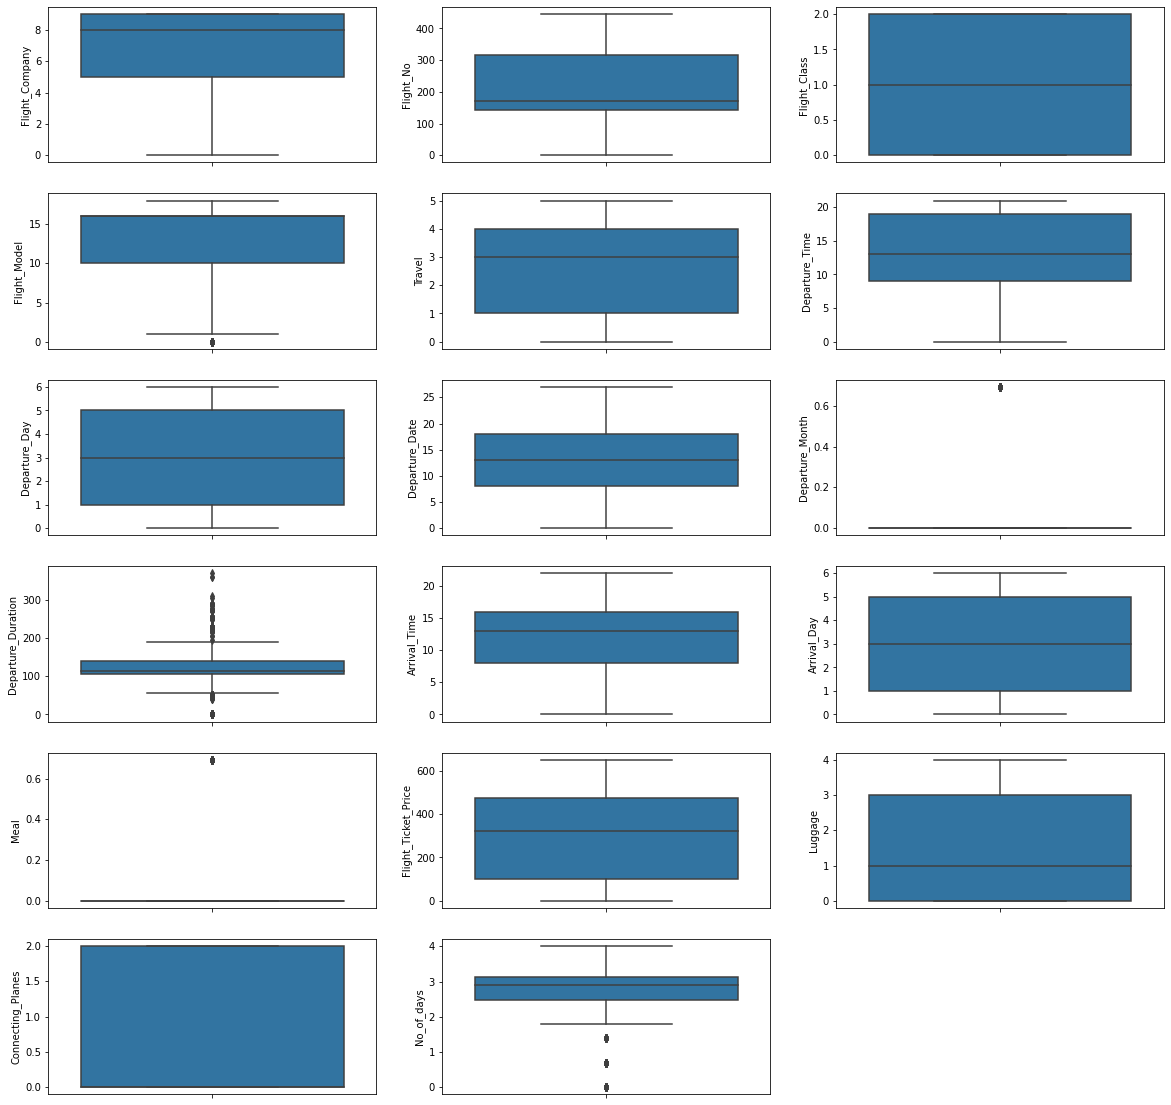

In [68]:
count=1
plt.subplots(figsize=(20, 20))
for i in df_new.columns:
    plt.subplot(6,3,count)
    sns.boxplot(y=df_new[i])
    
    count+=1

plt.show()

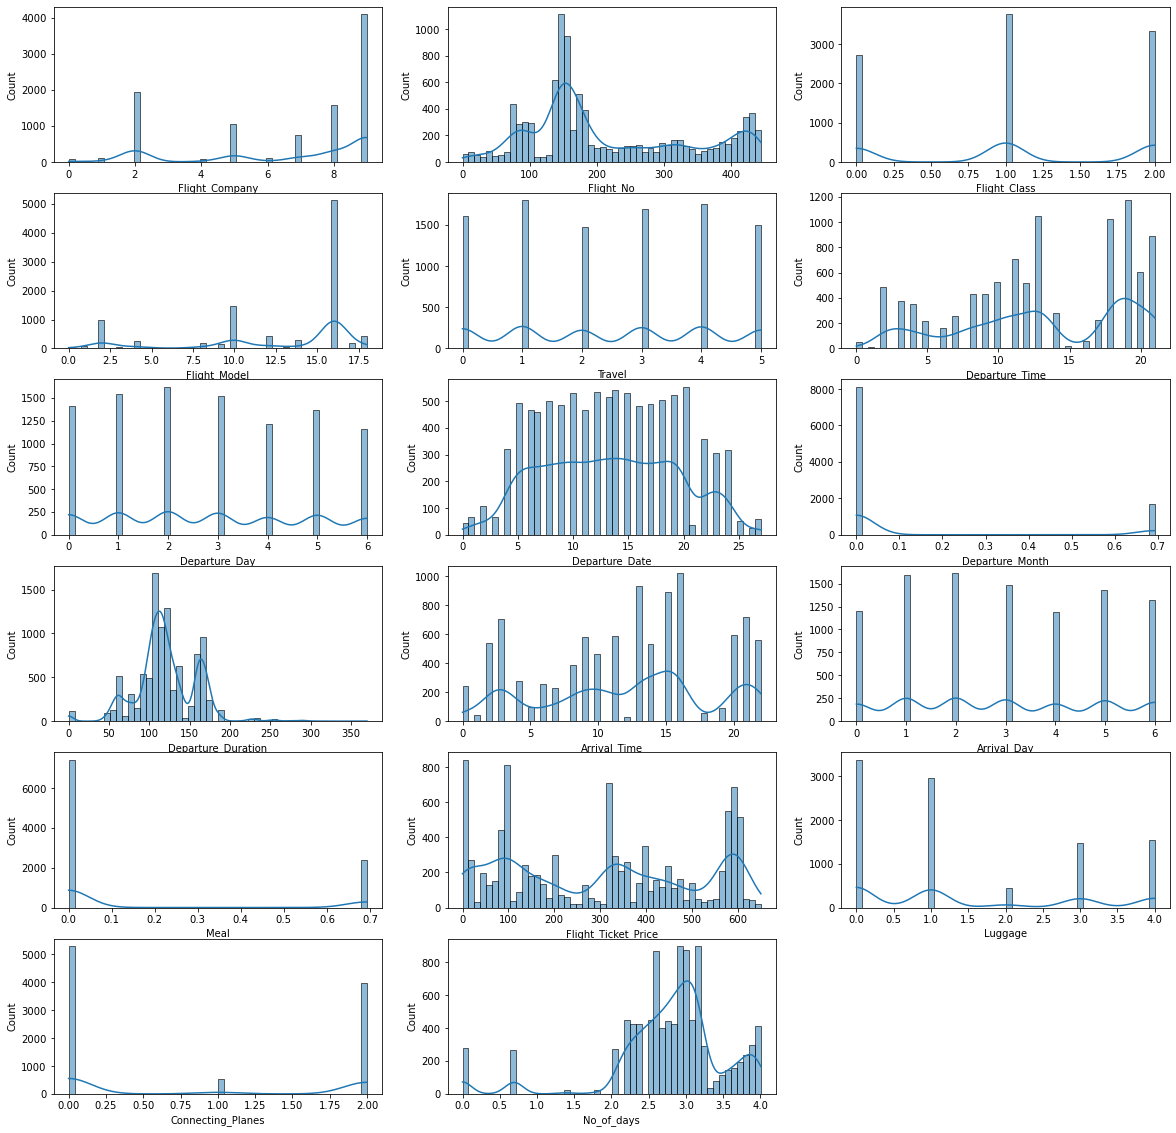

In [69]:
count=1
plt.subplots(figsize=(20, 20))
for i in df_new.columns:
    plt.subplot(6,3,count)
    sns.histplot(df_new[i], kde = True, bins = 50, label = df_new.skew())
    
    count+=1

plt.show()

In [70]:
X = df_new.drop(['Flight_Ticket_Price'],axis=1)
y = df_new['Flight_Ticket_Price']

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [73]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.8253761520069935
R2 score for the random state is 42 is 0.965746428754087
R2 score for the random state is 42 is 0.9009797730603857
R2 score for the random state is 42 is 0.969361270773485
R2 score for the random state is 42 is 0.9552278964550543
R2 score for the random state is 42 is 0.9841900872860583
R2 score for the random state is 42 is 0.9800864512507208
R2 score for the random state is 43 is 0.8255143074747503
R2 score for the random state is 43 is 0.9682571931126023
R2 score for the random state is 43 is 0.9020561301203335
R2 score for the random state is 43 is 0.971726381774189
R2 score for the random state is 43 is 0.9585399553700242
R2 score for the random state is 43 is 0.9859107793117933
R2 score for the random state is 43 is 0.9817663222988867
R2 score for the random state is 44 is 0.8260652624027155
R2 score for the random state is 44 is 0.9630773987845929
R2 score for the random state is 44 is 0.8945629211516628
R2 score for the 

R2 score for the random state is 62 is 0.8778354542293685
R2 score for the random state is 62 is 0.9627486740778277
R2 score for the random state is 62 is 0.9552303758118642
R2 score for the random state is 62 is 0.9843864751576585
R2 score for the random state is 62 is 0.9795669715291231
R2 score for the random state is 63 is 0.8270026502362949
R2 score for the random state is 63 is 0.9653989041331781
R2 score for the random state is 63 is 0.8817202022250155
R2 score for the random state is 63 is 0.9648754674829965
R2 score for the random state is 63 is 0.9570907314355384
R2 score for the random state is 63 is 0.9851183247254219
R2 score for the random state is 63 is 0.9770691878297134
R2 score for the random state is 64 is 0.8336494946581154
R2 score for the random state is 64 is 0.9642917771895201
R2 score for the random state is 64 is 0.8917775773755172
R2 score for the random state is 64 is 0.9681854423497877
R2 score for the random state is 64 is 0.9528510040503371
R2 score for t

R2 score for the random state is 82 is 0.9611202414739024
R2 score for the random state is 82 is 0.9867931432702054
R2 score for the random state is 82 is 0.9829662158890935
R2 score for the random state is 83 is 0.8270532824870966
R2 score for the random state is 83 is 0.96312312420136
R2 score for the random state is 83 is 0.8966105907678174
R2 score for the random state is 83 is 0.9636154523299634
R2 score for the random state is 83 is 0.95842535466784
R2 score for the random state is 83 is 0.9825403390409921
R2 score for the random state is 83 is 0.977272682365592
R2 score for the random state is 84 is 0.8286562956750415
R2 score for the random state is 84 is 0.9635205932133226
R2 score for the random state is 84 is 0.8868370066078228
R2 score for the random state is 84 is 0.9660706536871124
R2 score for the random state is 84 is 0.9558044893797208
R2 score for the random state is 84 is 0.9839806882901984
R2 score for the random state is 84 is 0.9787324572372934
R2 score for the ra

In [74]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [75]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [76]:
ETR=ExtraTreesRegressor()
RandomizedSearch_ETR=RandomizedSearchCV(estimator=ETR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=90,n_jobs=-1)
RandomizedSearch_ETR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=90, verbose=2)

In [78]:
RandomizedSearch_ETR.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 450}

In [79]:
RandomizedSearch_ETR.best_estimator_

ExtraTreesRegressor(max_depth=450, max_features='auto', n_estimators=1000)

In [84]:
ETR = ExtraTreesRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='auto',max_depth=450,random_state=90)
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 98.48414998011373


In [85]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  10.476769408502774
Mean squared Error:  654.353253460798
Root Mean Absolute Error:  3.2367838062655303


Text(0, 0.5, 'Predicted_Y')

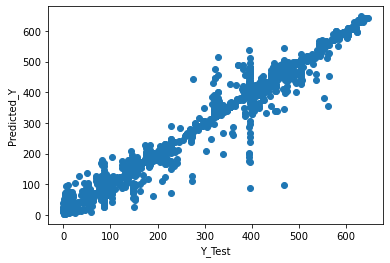

In [82]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

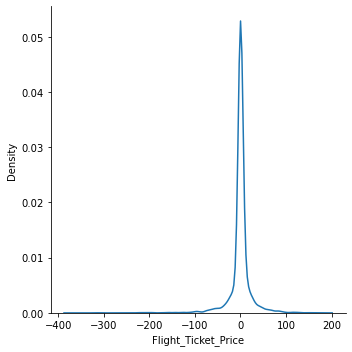

In [102]:
import seaborn as sns
reg_pred=ETR.predict(X_test)
sns.displot(reg_pred-y_test,kind='kde')

<AxesSubplot:>

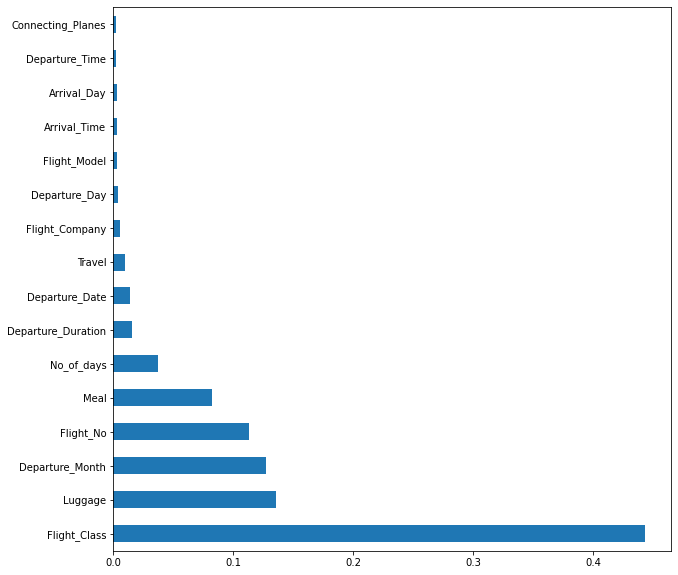

In [86]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(ETR.feature_importances_, index=X_train.columns)
feat_importances.nlargest(70).plot(kind='barh')

In [87]:
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=10)),
                     ('lr_regressor',LinearRegression())])

In [88]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=10)),
                     ('rf_regressor',RandomForestRegressor())])

In [89]:
pipeline_etr=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=10)),
                     ('rf_regressor',ExtraTreesRegressor())])

In [90]:
pipelines = [pipeline_lr, pipeline_dt,pipeline_etr]

In [91]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [92]:
pipe_dict = {0: 'Linear Regression',1:'RandomForest',2:'ExtraTreesRegressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [93]:
pred = pipe.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 96.34603873091946


In [94]:
pipe.steps

[('scalar2', StandardScaler()),
 ('pca2', PCA(n_components=10)),
 ('rf_regressor', ExtraTreesRegressor())]

### Pipeline for 5 features

In [95]:
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=5)),
                     ('lr_regressor',LinearRegression())])

In [96]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('rf_regressor',RandomForestRegressor())])

In [97]:
pipeline_etr=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('rf_regressor',ExtraTreesRegressor())])

In [98]:
pipelines = [pipeline_lr, pipeline_dt,pipeline_etr]

In [99]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [100]:
pipe_dict = {0: 'Linear Regression',1:'RandomForest',2:'ExtraTreesRegressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [101]:
pred = pipe.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 93.88767952824684
